# 03 Markowitz Portfolio Optimization

- 1952, Harry Markowitz published a papper
  - Summary : You should not invest all in the same asset type
  - Investors interested in the highest return
  - Investment in multiple securities should be studied as portfolio
  - Calculating efficient frontier of group of portfolios 
  


In [15]:
# CALCULATE Portfolio Efficientcy

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# magic function
# specific for jupyter notebook
# Facilitates plotting matplotlib graphs just below code cells and 
# storing them in the notebook document 
%matplotlib inline


In [9]:
assets = ['MSFT', '^GSPC']  # Microsoft with S&P 500
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2015-01-01')['Adj Close']

pf_data.tail()

,MSFT,^GSPC
Date,,
2020-07-28,202.020004,3218.439941
2020-07-29,204.059998,3258.439941
2020-07-30,203.899994,3246.219971
2020-07-31,205.009995,3271.120117
2020-08-03,216.539993,3294.610107


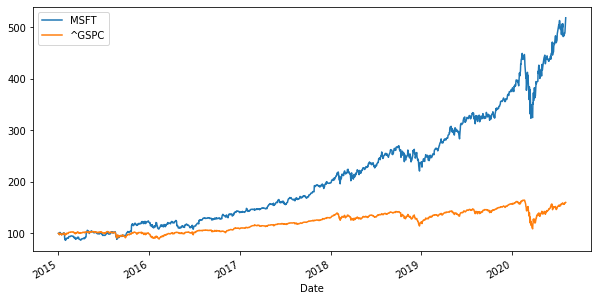

In [10]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [17]:
log_returns = np.log(pf_data / pf_data.shift(1))

print(log_returns.mean()* 250) # yearly mean
print(log_returns.cov() * 250)
print(log_returns.corr())


MSFT     0.292902
^GSPC    0.083711
dtype: float64
           MSFT     ^GSPC
MSFT   0.075988  0.042106
^GSPC  0.042106  0.035300
           MSFT     ^GSPC
MSFT   1.000000  0.812995
^GSPC  0.812995  1.000000


In [24]:
num_assets = len(assets)
weights = np.random.random(num_assets)  # create random weights - will sum up to 1
weights /= np.sum(weights)   # remember, here is the trick : w = w / sum(w)
weights

array([0.25485923, 0.74514077])

In [25]:
weights[0] + weights[1] == 1   

True

Expected Portfolio return:

In [26]:
np.sum(weights * log_returns.mean()) * 250

0.13702532914135548

Expected Portfolio Variance:

In [28]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.040527971298931625

Expected Portfolio Volatility:

In [29]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.20131560123083264

<b>NOTE:</b>
- Here we are not considering 1000 different investments, instead, we are considering 1000 different combinations (weights in this case) of the same asset 
- The idea is the find the most efficient combination(x% MSFT, y% S&P500) for the asset (portfolio)

In [32]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)  # create random weights - will sum up to 1
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

# 
pfolio_returns = np.array(pfolio_returns) # convert to an array
pfolio_volatilities = np.array(pfolio_volatilities)
    
pfolio_returns
    

array([0.18840848, 0.26589298, 0.14954194, 0.1717686 , 0.17526118,
       0.27969431, 0.21019331, 0.26169779, 0.19513129, 0.2075112 ,
       0.24303805, 0.13120788, 0.20414485, 0.17115025, 0.24667743,
       0.27409492, 0.18112836, 0.24357799, 0.13830353, 0.18483266,
       0.19328306, 0.16895727, 0.20293694, 0.17185437, 0.11217908,
       0.16870291, 0.26098373, 0.2339585 , 0.25840917, 0.19675904,
       0.21814402, 0.17081749, 0.10595438, 0.15756451, 0.20037524,
       0.22720633, 0.1630242 , 0.25227312, 0.20919292, 0.24536807,
       0.28305762, 0.24875256, 0.15487609, 0.22873635, 0.16010803,
       0.21474596, 0.22227839, 0.20726331, 0.18538907, 0.09510546,
       0.28061574, 0.09563749, 0.18261532, 0.11633683, 0.19545709,
       0.23821143, 0.18851611, 0.15076955, 0.23370473, 0.17356883,
       0.19806465, 0.19737109, 0.21921856, 0.25418803, 0.09799947,
       0.12514914, 0.18387312, 0.16492823, 0.26437918, 0.17731224,
       0.1911491 , 0.11613903, 0.19999786, 0.15751681, 0.24154